In [14]:
library(imager)
library(SynchWave)
library(dplyr)
library(sparr)
library(reshape2)


Attache Paket: ‘reshape2’


Die folgenden Objekte sind maskiert von ‘package:reshape’:

    colsplit, melt, recast




In [42]:
# Define a function to show face images ####
showImage <- function(x) {
  as.matrix(x) %>%
  apply(2, rev) %>% #Rotate matrix by 90 degrees, step one : reverse columns 
  t %>% # Rotate matrix by 90 degrees, step two: transpose matrix
  image(col=grey(seq(0, 1, length=256)), xaxt="n", yaxt="n") # 256 diffrent intensities between 0 and 1 defined
}

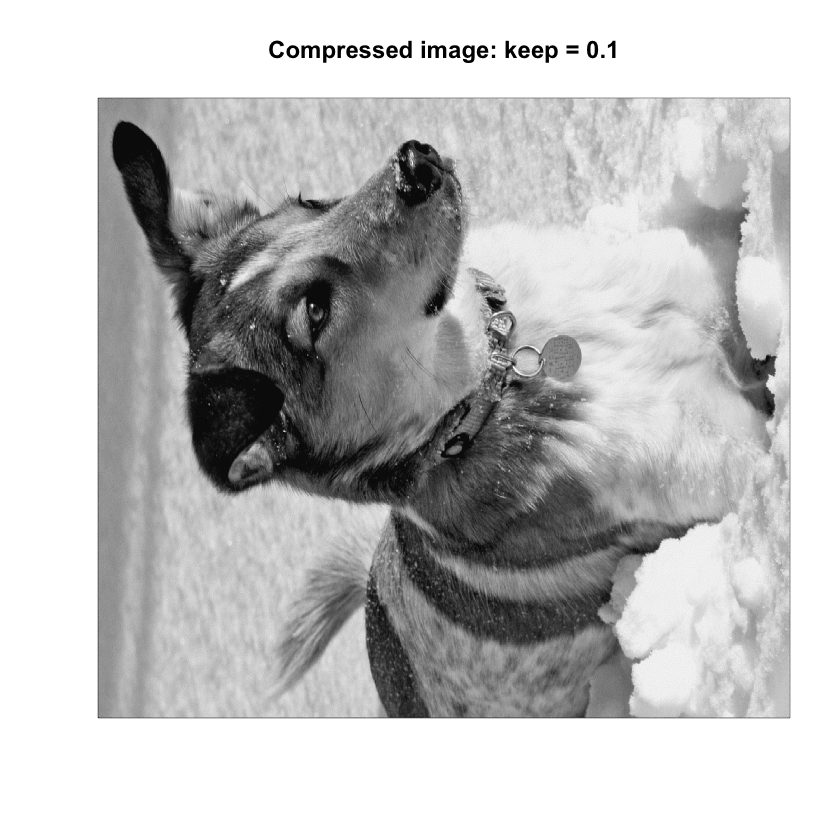

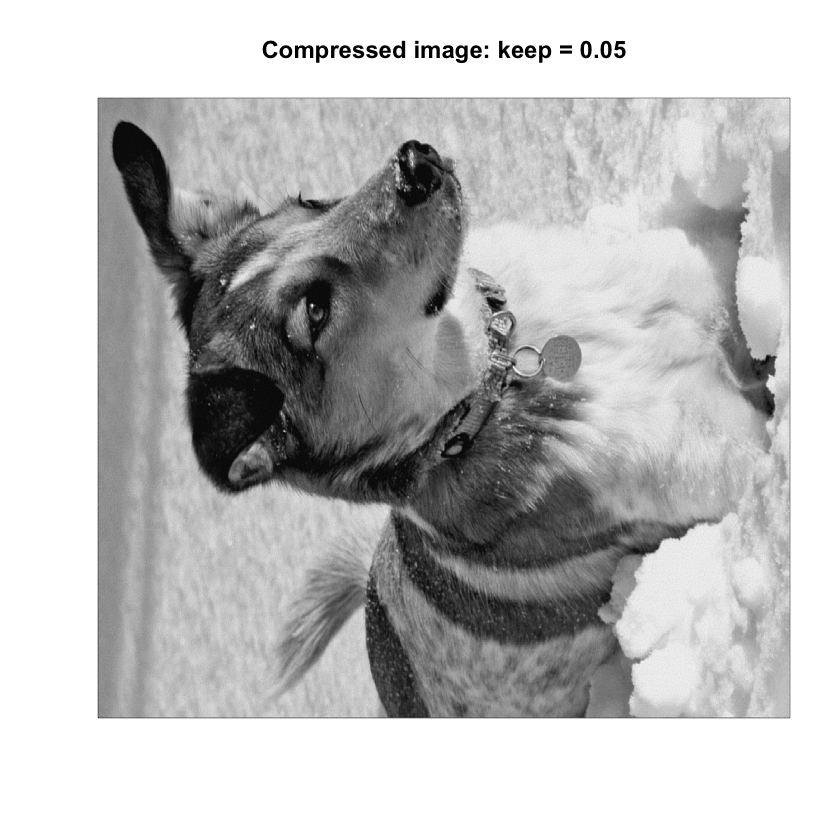

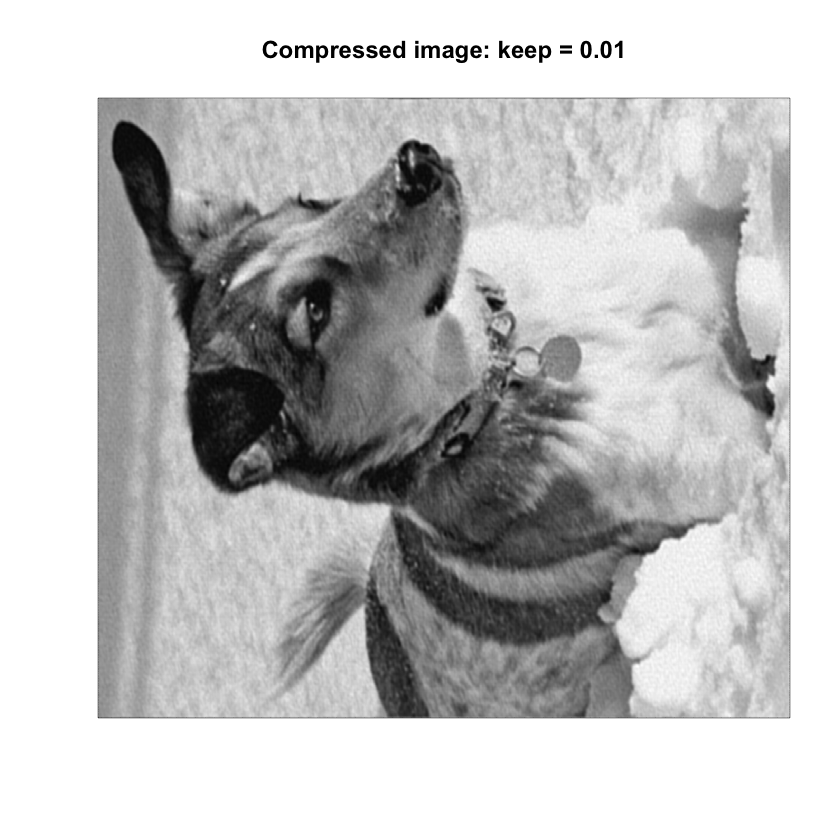

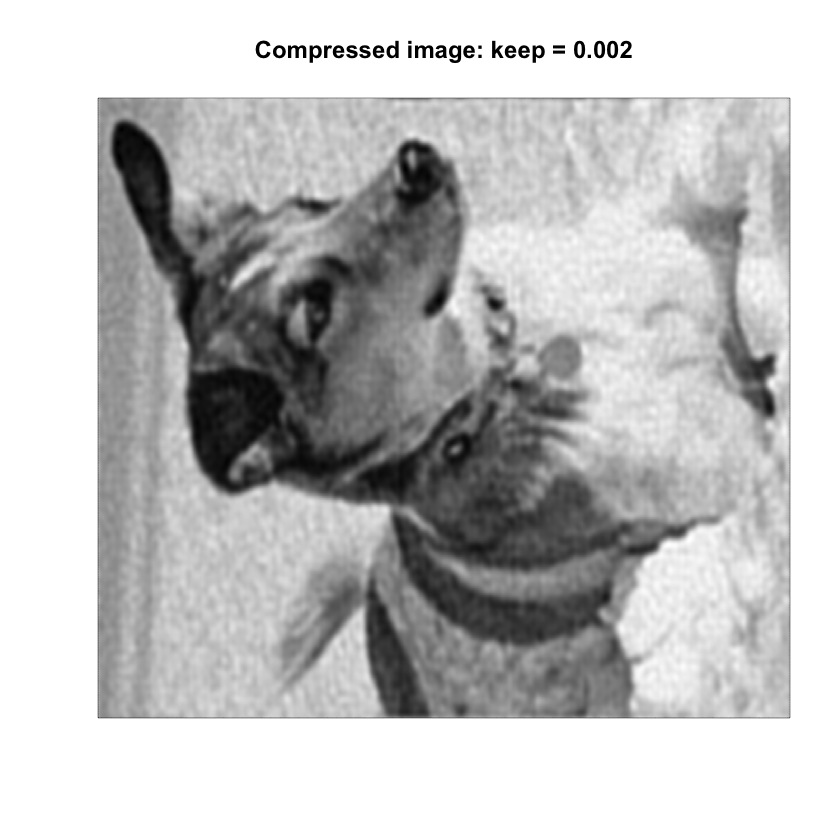

In [43]:
#Load Image
A <- load.image("../DATA/dog.jpg")

#Convert to grayscale image
X <- grayscale(A)

Bt <- fft2d(X)

Btsort <- sort(abs(melt.array(Xt)[,5]))

coefficients <- c(0.1, 0.05, 0.01, 0.002)

# Zero out all small coefficients and inverse transform
for (keep in coefficients) {
    thresh <- Btsort[as.integer(floor((1-keep)*length(Btsort)))]
    ind <- abs(Bt)>thresh                  # Find small indices
    Atlow <- Bt * ind                      # Threshold small indices
    Alow <- Re(fft2d(Atlow, inverse=TRUE)) # Compressed image
    showImage(Alow)
    title(paste0("Compressed image: keep = ",keep))
    }

#Xtsort = sort(abs(Bt.reshape(-1))) # sort by magnitude